In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from PyNomad_opt import ObjectiveFunction_PyNomad


# SMAC



## Testing the ConfigurationSpace variable

Create and sample it


In [ ]:
from smac import Scenario # , HyperparameterOptimizationFacade
# from smac.multi_objective.parego import ParEGO
from ConfigSpace import ConfigurationSpace # , UniformFloatHyperparameter
from PyNomad_opt import ObjectiveFunction_PyNomad
# Objective
obj = ObjectiveFunction_PyNomad("Ackley", dim=2, size=64)
# grid = np.linspace(0, 64, 64).tolist()

search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)

cs = ConfigurationSpace({"myint":(0, len(search_space)-1)})


configs = cs.sample_configuration(2)
print(configs)

[Configuration(values={
  'myint': 1738,
}), Configuration(values={
  'myint': 2781,
})]


## Main test


[INFO][abstract_initial_design.py:139] Using 10 initial design configurations and 0 additional configurations.
Config: Configuration(values={
  'x': 1093,
})
[INFO][abstract_intensifier.py:517] Added config 87700a as new incumbent because there are no incumbents yet.
Config: Configuration(values={
  'x': 1093,
})
Config: Configuration(values={
  'x': 2932,
})
Config: Configuration(values={
  'x': 2932,
})
Config: Configuration(values={
  'x': 1093,
})
Config: Configuration(values={
  'x': 3425,
})
Config: Configuration(values={
  'x': 3425,
})
Config: Configuration(values={
  'x': 3425,
})
Config: Configuration(values={
  'x': 593,
})
Config: Configuration(values={
  'x': 593,
})
Config: Configuration(values={
  'x': 593,
})
Config: Configuration(values={
  'x': 404,
})
Config: Configuration(values={
  'x': 404,
})
Config: Configuration(values={
  'x': 404,
})
Config: Configuration(values={
  'x': 3748,
})
Config: Configuration(values={
  'x': 3748,
})
Config: Configuration(values={
  

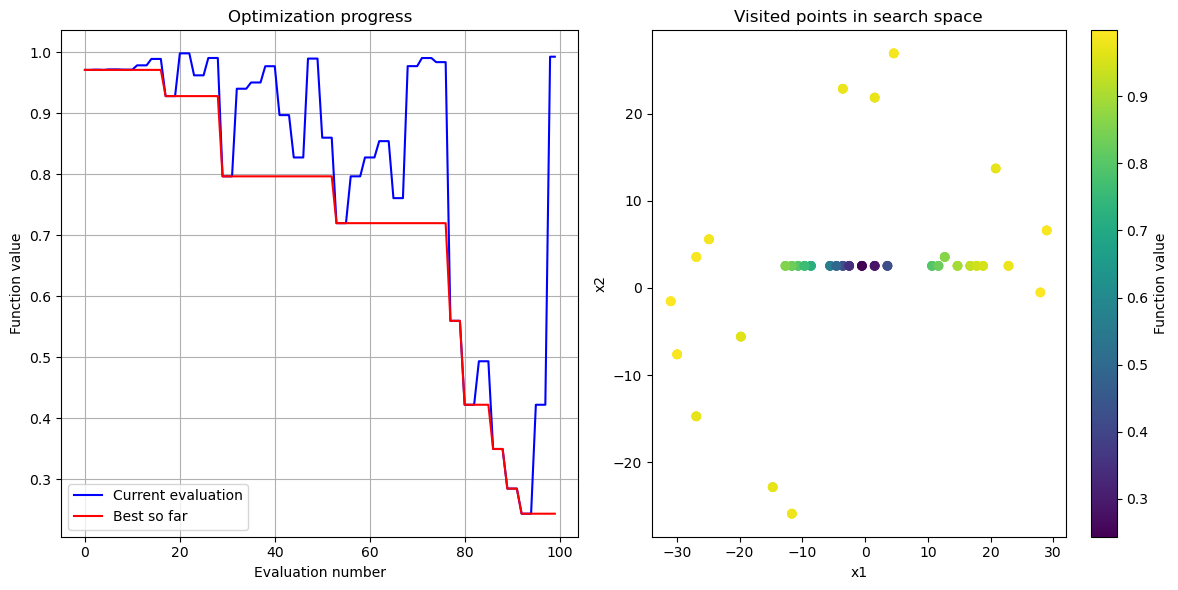

Best config: Configuration(values={
  'x': 2207,
})
Best index: 2207
Best coordinates corresponding to index: [-0.50793651  2.53968254]
Output value: 0.24369997094608523


In [43]:
from smac import Scenario, HyperparameterOptimizationFacade
# from smac.multi_objective.parego import ParEGO
from ConfigSpace import ConfigurationSpace # , UniformFloatHyperparameter
# Objective
obj = ObjectiveFunction_PyNomad("Ackley", dim=2, size=64)
# grid = np.linspace(0, 64, 64).tolist()

search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)

# Define search space
cs = ConfigurationSpace({"x":(0, len(search_space)-1)})

# Define search space
# cs = ConfigurationSpace()
# grid = np.linspace(obj.lower_bound, obj.upper_bound, obj.size)
# cs.add(UniformFloatHyperparameter(f"x", 0, obj.upper_bound)) # , q=1

# Lists to store optimization history
history_indices = []
history_values = []
history_coordinates = []

# Objective function
def smac_objective(config, seed=42):
    print("Config:", config)
    index = config[f"x"]
    val = response[int(index)]
    
    # Lists to store optimization history
    history_indices.append(index)
    history_values.append(val)
    history_coordinates.append(search_space[index])
    
    val = response[int(index)]
    return val

# Scenario
scenario = Scenario(cs, n_trials=100)

# SMAC optimizer
smac = HyperparameterOptimizationFacade(scenario, smac_objective)
incumbent = smac.optimize()

# Plotting the optimization progress
plt.figure(figsize=(12, 6))

# Plot 1: Function values over trials
plt.subplot(1, 2, 1)
plt.plot(history_values, 'b-', label='Current evaluation')
plt.plot(np.minimum.accumulate(history_values), 'r-', label='Best so far')
plt.xlabel('Evaluation number')
plt.ylabel('Function value')
plt.title('Optimization progress')
plt.legend()
plt.grid(True)

# Plot 2: Visited points in search space
plt.subplot(1, 2, 2)
if len(search_space[0]) == 1:  # 1D case
    plt.scatter([p[0] for p in history_coordinates], history_values, c=range(len(history_coordinates)), cmap='viridis')
    plt.colorbar(label='Evaluation order')
    plt.xlabel('x')
    plt.ylabel('Function value')
    plt.title('Visited points')
elif len(search_space[0]) == 2:  # 2D case
    plt.scatter([p[0] for p in history_coordinates], [p[1] for p in history_coordinates], 
               c=history_values, cmap='viridis')
    plt.colorbar(label='Function value')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Visited points in search space')
else:
    print("Can't plot high-dimensional search space directly")

plt.tight_layout()
plt.show()

# Print best results
best_index = int(incumbent['x'])
print("Best config:", incumbent)
print("Best index:", best_index)
print("Best coordinates corresponding to index:", search_space[best_index])
print("Output value:", response[best_index])


In [6]:
from __future__ import annotations

from smac.scenario import Scenario
from smac.facade import HyperparameterOptimizationFacade
from ConfigSpace import Configuration, ConfigurationSpace, Float
from smac.runhistory.dataclasses import TrialValue, TrialInfo


class Rosenbrock2D:
    @property
    def configspace(self) -> ConfigurationSpace:
        cs = ConfigurationSpace(seed=0)
        x0 = Float("x0", (-5, 10), default=-3)
        x1 = Float("x1", (-5, 10), default=-4)
        cs.add([x0, x1])

        return cs

    def evaluate(self, config: Configuration, seed: int = 0) -> float:
        """The 2-dimensional Rosenbrock function as a toy model.
        The Rosenbrock function is well know in the optimization community and
        often serves as a toy problem. It can be defined for arbitrary
        dimensions. The minimium is always at x_i = 1 with a function value of
        zero. All input parameters are continuous. The search domain for
        all x's is the interval [-5, 10].
        """
        x1 = config["x0"]
        x2 = config["x1"]

        cost = 100.0 * (x2 - x1**2.0) ** 2.0 + (1 - x1) ** 2.0
        return cost


if __name__ == "__main__":
    SEED = 12345
    task = Rosenbrock2D()

    # Previous evaluations
    # X vectors need to be connected to the configuration space
    configurations = [
        Configuration(task.configspace, {'x0':1, 'x1':2}),
        Configuration(task.configspace, {'x0':-1, 'x1':3}),
        Configuration(task.configspace, {'x0':5, 'x1':5}),
    ]
    costs = [task.evaluate(c, seed=SEED) for c in configurations]

    # Define optimization problem and budget
    scenario = Scenario(task.configspace, deterministic=False, n_trials=30)
    intensifier = HyperparameterOptimizationFacade.get_intensifier(scenario, max_config_calls=1)
    smac = HyperparameterOptimizationFacade(
        scenario,
        task.evaluate,
        intensifier=intensifier,
        overwrite=True,

        # Modify the initial design to use our custom initial design
        initial_design=HyperparameterOptimizationFacade.get_initial_design(
            scenario,
            n_configs=0,  # Do not use the default initial design
            additional_configs=configurations  # Use the configurations previously evaluated as initial design
                                               # This only passes the configurations but not the cost!
                                               # So in order to actually use the custom, pre-evaluated initial design
                                               # we need to tell those trials, like below.
        )
    )

    # Convert previously evaluated configurations into TrialInfo and TrialValue instances to pass to SMAC
    trial_infos = [TrialInfo(config=c, seed=SEED) for c in configurations]
    trial_values = [TrialValue(cost=c) for c in costs]

    # Warmstart SMAC with the trial information and values
    for info, value in zip(trial_infos, trial_values):
        smac.tell(info, value)

    # Optimize as usual
    incumbent = smac.optimize()

[INFO][abstract_initial_design.py:74] Using `n_configs` and ignoring `n_configs_per_hyperparameter`.
[INFO][abstract_initial_design.py:87] Reducing the number of initial configurations from 0 to 1 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:125] No initial configurations are used.
[INFO][abstract_initial_design.py:139] Using 0 initial design configurations and 3 additional configurations.
[INFO][abstract_intensifier.py:517] Added config e5b753 as new incumbent because there are no incumbents yet.
[INFO][intensifier.py:126] Added config e5b753 from runhistory to the intensifier queue.
[INFO][intensifier.py:126] Added config 2248fe from runhistory to the intensifier queue.
[INFO][intensifier.py:126] Added config 5249a8 from runhistory to the intensifier queue.
[INFO][abstract_intensifier.py:289] Added existing seed 12345 from runhistory to the intensifier.
[INFO][abstract_intensifier.py:596] Added config 3fcd9b and rejected config e5b753 as incumbent because it is not better t

# Hyperopt

Uses the Tree of Parzen Estimators (TPE) method


100%|██████████| 100/100 [00:23<00:00,  4.19trial/s, best loss: 0.12371504347770576]


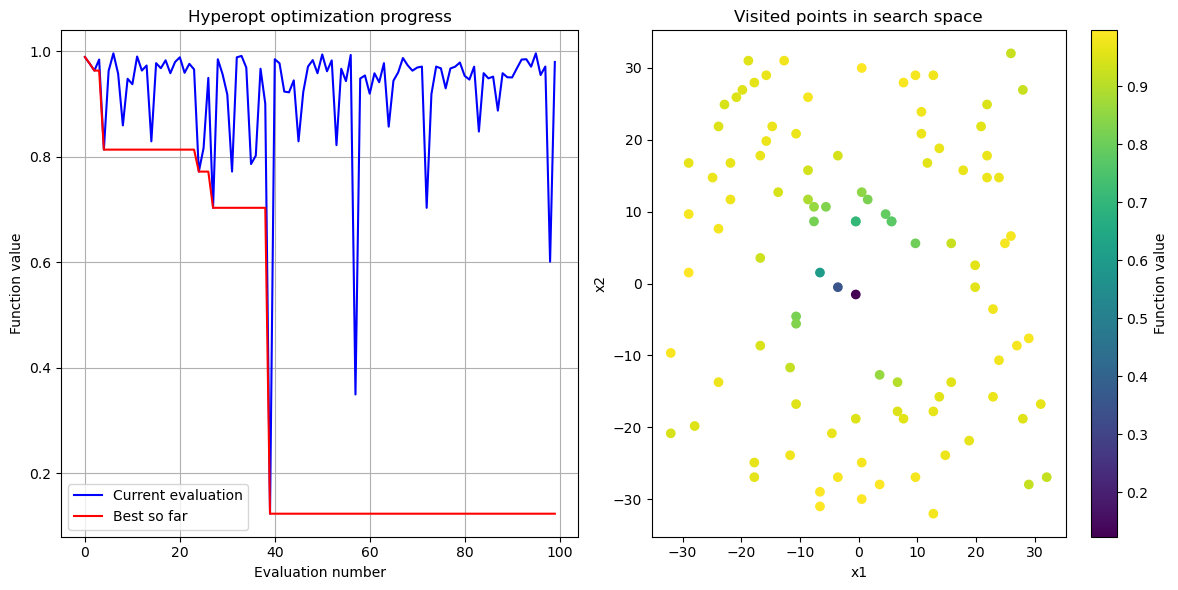


Best index: 1951
Best coordinates corresponding to index: [-0.50793651 -1.52380952]
Output value: 0.12371504347770576


In [4]:
from hyperopt import fmin, tpe, hp, Trials

# Objective
obj = ObjectiveFunction_PyNomad("Ackley", dim=2, size=64)

search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)

grid = np.arange(0, len(search_space)-1, 1)
# grid = np.linspace(0, 64, 64).tolist()

# Define search space
space = {
    f"x": hp.choice(f"x", grid)
    # for i in range(obj.dim)
}

def objective(params):
    index = params[f"x"]
    val = response[int(index)]
    return val

    # x = [params[f"x{i}"] for i in range(obj.dim)]
    # val = obj.f(torch.tensor(x))
    # return val.item()  # Minimize by default

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

# Extract optimization history
history_indices = [t['misc']['vals']['x'][0] for t in trials.trials]
history_values = [t['result']['loss'] for t in trials.trials]
history_coordinates = [search_space[int(idx)] for idx in history_indices]

# Plotting the optimization progress
plt.figure(figsize=(12, 6))

# Plot 1: Function values over trials
plt.subplot(1, 2, 1)
plt.plot(history_values, 'b-', label='Current evaluation')
plt.plot(np.minimum.accumulate(history_values), 'r-', label='Best so far')
plt.xlabel('Evaluation number')
plt.ylabel('Function value')
plt.title('Hyperopt optimization progress')
plt.legend()
plt.grid(True)

# Plot 2: Visited points in search space
plt.subplot(1, 2, 2)
if len(search_space[0]) == 1:  # 1D case
    plt.scatter([p[0] for p in history_coordinates], history_values, 
               c=range(len(history_coordinates)), cmap='viridis')
    plt.colorbar(label='Evaluation order')
    plt.xlabel('x')
    plt.ylabel('Function value')
    plt.title('Visited points')
elif len(search_space[0]) == 2:  # 2D case
    plt.scatter([p[0] for p in history_coordinates], [p[1] for p in history_coordinates], 
               c=history_values, cmap='viridis')
    plt.colorbar(label='Function value')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Visited points in search space')
else:
    print("Can't plot high-dimensional search space directly")

plt.tight_layout()
plt.show()

# Print best results
best_index = int(best['x'])
print("\nBest index:", best_index)
print("Best coordinates corresponding to index:", search_space[best_index])
print("Output value:", response[best_index])


In [5]:
history_indices

[348,
 1846,
 690,
 1530,
 2584,
 3075,
 160,
 2035,
 1251,
 3637,
 3031,
 217,
 940,
 1160,
 2714,
 3562,
 3151,
 3671,
 1199,
 2504,
 1596,
 3790,
 532,
 3189,
 2597,
 1749,
 3659,
 2591,
 2627,
 3115,
 316,
 2597,
 1408,
 291,
 3280,
 2660,
 2409,
 731,
 1190,
 1951,
 2489,
 3884,
 2415,
 4089,
 704,
 1685,
 3771,
 3349,
 2424,
 1069,
 2115,
 462,
 361,
 2785,
 3856,
 2834,
 89,
 2012,
 934,
 3981,
 1300,
 871,
 3164,
 1399,
 2712,
 3593,
 334,
 3815,
 2762,
 1022,
 1078,
 2999,
 2591,
 383,
 558,
 3245,
 2255,
 3057,
 2997,
 3987,
 981,
 1487,
 2951,
 2848,
 2227,
 863,
 3724,
 2775,
 3444,
 772,
 3400,
 3082,
 480,
 3881,
 3409,
 3936,
 891,
 3370,
 2137,
 44]

In [ ]:
from hyperopt import fmin, tpe, hp, Trials

# Objective
obj = ObjectiveFunction_PyNomad("Ackley", dim=2, size=64)

search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)

grid = np.arange(0, len(search_space)-1, 1)
# grid = np.linspace(0, 64, 64).tolist()

# Define search space
space = {
    f"x": hp.choice(f"x", grid)
    # for i in range(obj.dim)
}

def objective(params):
    index = params[f"x"]
    val = response[int(index)]
    return val

    # x = [params[f"x{i}"] for i in range(obj.dim)]
    # val = obj.f(torch.tensor(x))
    # return val.item()  # Minimize by default

trials = Trials()

initial_indices = [0, 32, 63]  # Example indices
for idx in initial_indices:
    val = response[idx]
    trials.new_trial()
    trials.trials[-1]['result'] = {'loss': val, 'status': 'ok'}
    trials.trials[-1]['misc'] = {'vals': {'x': idx}}

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100-len(initial_indices),  # Subtract initial points from max_evals
    trials=trials,
    # points_to_evaluate=initial_points
)

# Extract optimization history
history_indices = [t['misc']['vals']['x'][0] for t in trials.trials]
history_values = [t['result']['loss'] for t in trials.trials]
history_coordinates = [search_space[int(idx)] for idx in history_indices]

# Plotting the optimization progress
plt.figure(figsize=(12, 6))

# Plot 1: Function values over trials
plt.subplot(1, 2, 1)
plt.plot(history_values, 'b-', label='Current evaluation')
plt.plot(np.minimum.accumulate(history_values), 'r-', label='Best so far')
plt.xlabel('Evaluation number')
plt.ylabel('Function value')
plt.title('Hyperopt optimization progress')
plt.legend()
plt.grid(True)

# Plot 2: Visited points in search space
plt.subplot(1, 2, 2)
if len(search_space[0]) == 1:  # 1D case
    plt.scatter([p[0] for p in history_coordinates], history_values, 
               c=range(len(history_coordinates)), cmap='viridis')
    plt.colorbar(label='Evaluation order')
    plt.xlabel('x')
    plt.ylabel('Function value')
    plt.title('Visited points')
elif len(search_space[0]) == 2:  # 2D case
    plt.scatter([p[0] for p in history_coordinates], [p[1] for p in history_coordinates], 
               c=history_values, cmap='viridis')
    plt.colorbar(label='Function value')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Visited points in search space')
else:
    print("Can't plot high-dimensional search space directly")

plt.tight_layout()
plt.show()

# Print best results
best_index = int(best['x'])
print("\nBest index:", best_index)
print("Best coordinates corresponding to index:", search_space[best_index])
print("Output value:", response[best_index])


AttributeError: 'Trials' object has no attribute 'new_trial'

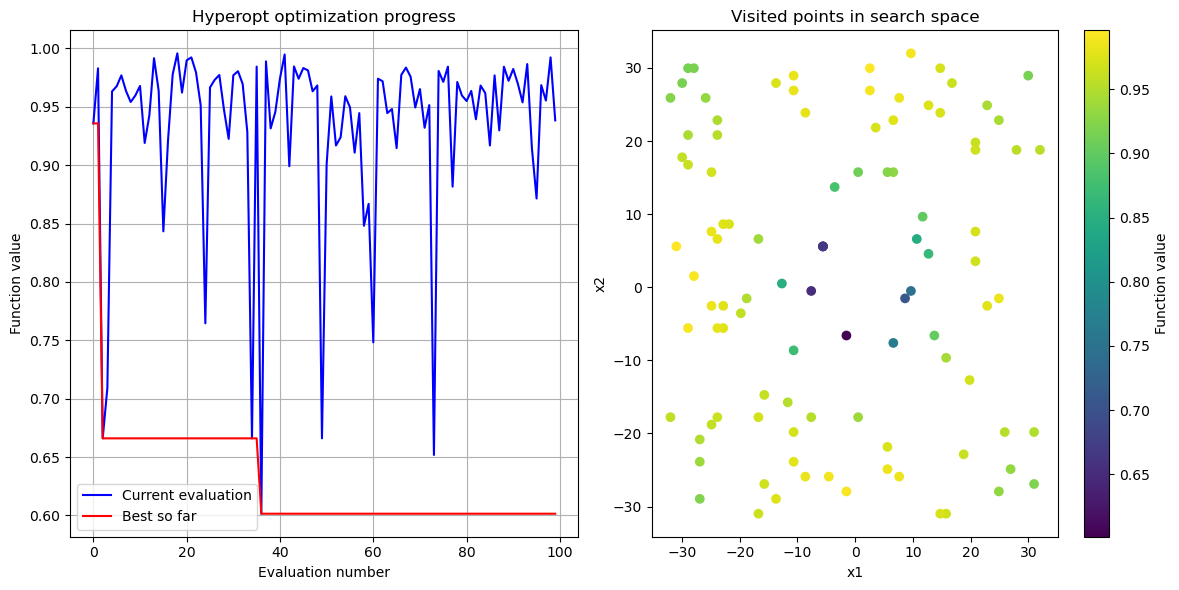


Best index: 1956
Best coordinates corresponding to index: [ 4.57142857 -1.52380952]
Output value: 0.4605410062517968


In [13]:
history_indices = [t['misc']['vals']['x'][0] for t in trials.trials]
history_values = [t['result']['loss'] for t in trials.trials]
history_coordinates = [search_space[int(idx)] for idx in history_indices]

# Plotting the optimization progress
plt.figure(figsize=(12, 6))

# Plot 1: Function values over trials
plt.subplot(1, 2, 1)
plt.plot(history_values, 'b-', label='Current evaluation')
plt.plot(np.minimum.accumulate(history_values), 'r-', label='Best so far')
plt.xlabel('Evaluation number')
plt.ylabel('Function value')
plt.title('Hyperopt optimization progress')
plt.legend()
plt.grid(True)

# Plot 2: Visited points in search space
plt.subplot(1, 2, 2)
if len(search_space[0]) == 1:  # 1D case
    plt.scatter([p[0] for p in history_coordinates], history_values, 
               c=range(len(history_coordinates)), cmap='viridis')
    plt.colorbar(label='Evaluation order')
    plt.xlabel('x')
    plt.ylabel('Function value')
    plt.title('Visited points')
elif len(search_space[0]) == 2:  # 2D case
    plt.scatter([p[0] for p in history_coordinates], [p[1] for p in history_coordinates], 
               c=history_values, cmap='viridis')
    plt.colorbar(label='Function value')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Visited points in search space')
else:
    print("Can't plot high-dimensional search space directly")

plt.tight_layout()
plt.show()

# Print best results
best_index = int(best['x'])
print("\nBest index:", best_index)
print("Best coordinates corresponding to index:", search_space[best_index])
print("Output value:", response[best_index])


In [14]:
history_indices

[517,
 3861,
 2394,
 1960,
 3316,
 336,
 1910,
 3824,
 3336,
 896,
 111,
 382,
 1455,
 1667,
 904,
 2474,
 197,
 533,
 3938,
 626,
 3746,
 2116,
 3543,
 1044,
 1574,
 2292,
 677,
 1673,
 3464,
 3648,
 2569,
 2440,
 2548,
 3046,
 2394,
 1863,
 1630,
 4073,
 3654,
 3331,
 210,
 2369,
 2667,
 1976,
 2570,
 407,
 3733,
 3075,
 911,
 2394,
 1645,
 3138,
 3778,
 3045,
 839,
 830,
 3040,
 3512,
 2067,
 2348,
 2025,
 3794,
 110,
 3638,
 709,
 3907,
 3494,
 485,
 3628,
 1933,
 3252,
 506,
 920,
 2008,
 1672,
 3566,
 3687,
 2908,
 3950,
 1804,
 3263,
 79,
 2447,
 789,
 1104,
 3908,
 1865,
 312,
 423,
 3427,
 2503,
 1267,
 825,
 411,
 3901,
 1493,
 3015,
 3259,
 286,
 928]

# Optuna


[I 2025-07-09 14:55:57,768] A new study created in memory with name: no-name-51ab08a8-8714-4e8c-b5f5-d2d3131a1435
[I 2025-07-09 14:55:57,770] Trial 0 finished with value: 0.9888859492198694 and parameters: {'x': 4054.0}. Best is trial 0 with value: 0.9888859492198694.
[I 2025-07-09 14:55:57,771] Trial 1 finished with value: 0.7865068063458674 and parameters: {'x': 2651.0}. Best is trial 1 with value: 0.7865068063458674.
[I 2025-07-09 14:55:57,772] Trial 2 finished with value: 0.9716202764643533 and parameters: {'x': 3348.0}. Best is trial 1 with value: 0.7865068063458674.
[I 2025-07-09 14:55:57,774] Trial 3 finished with value: 0.9306926262771553 and parameters: {'x': 1362.0}. Best is trial 1 with value: 0.7865068063458674.
[I 2025-07-09 14:55:57,776] Trial 4 finished with value: 0.969829386832882 and parameters: {'x': 3282.0}. Best is trial 1 with value: 0.7865068063458674.
[I 2025-07-09 14:55:57,776] Trial 5 finished with value: 0.959040943607724 and parameters: {'x': 3207.0}. Best i

[INFO][utils.py:148] Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[INFO][utils.py:160] NumExpr defaulting to 8 threads.


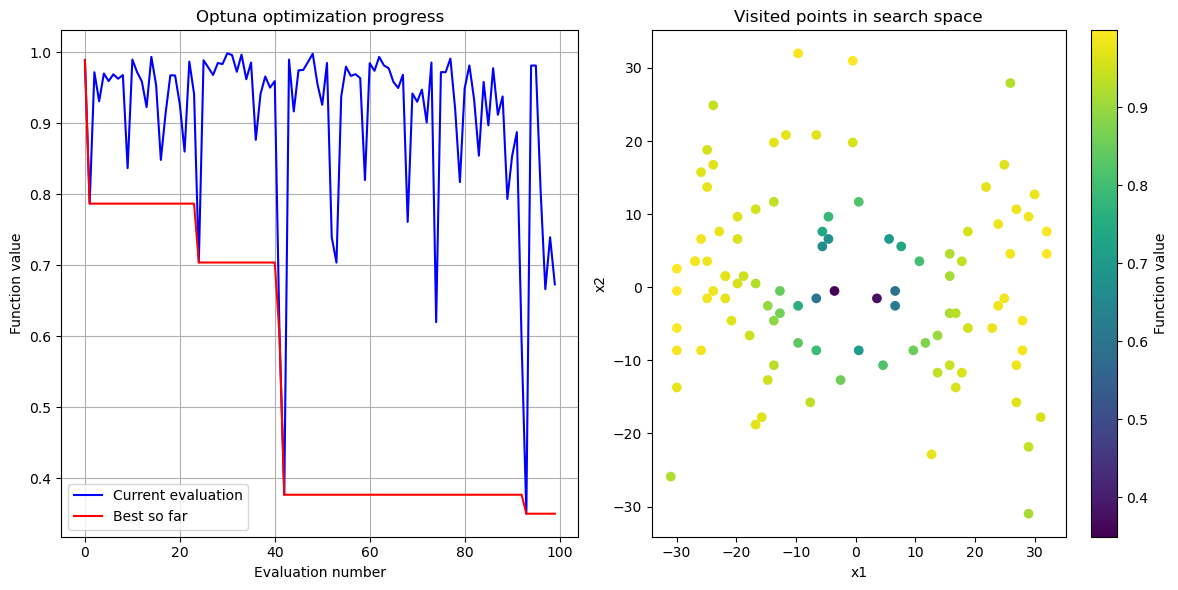


Best index: 2012
Best coordinates corresponding to index: [-3.55555556 -0.50793651]
Output value: 0.34974059730713847


In [47]:
import optuna

# Objective
obj = ObjectiveFunction_PyNomad("Ackley", dim=2, size=64)

search_space = obj.create_input_space()
response = obj.generate_true_response(search_space)

step = 1 #(obj.upper_bound - obj.lower_bound) / (obj.size - 1)

def objective(trial):
    index = trial.suggest_float(f"x", 0, len(search_space)-1, step=step) # for i in range(obj.dim)
    # print(index)
    # x = search_space[int(index)]
    # print("x ", x, "\n")
    # val = obj.f(torch.tensor(x))
    val = response[int(index)]
    return val#.item()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Extract optimization history
history = study.trials_dataframe()
history_indices = history['params_x'].apply(lambda x: int(round(x))).values
history_values = history['value'].values
history_coordinates = [search_space[idx] for idx in history_indices]

# Plotting the optimization progress
plt.figure(figsize=(12, 6))

# Plot 1: Function values over trials
plt.subplot(1, 2, 1)
plt.plot(history_values, 'b-', label='Current evaluation')
plt.plot(np.minimum.accumulate(history_values), 'r-', label='Best so far')
plt.xlabel('Evaluation number')
plt.ylabel('Function value')
plt.title('Optuna optimization progress')
plt.legend()
plt.grid(True)

# Plot 2: Visited points in search space
plt.subplot(1, 2, 2)
if len(search_space[0]) == 1:  # 1D case
    plt.scatter([p[0] for p in history_coordinates], history_values, 
               c=range(len(history_coordinates)), cmap='viridis')
    plt.colorbar(label='Evaluation order')
    plt.xlabel('x')
    plt.ylabel('Function value')
    plt.title('Visited points')
elif len(search_space[0]) == 2:  # 2D case
    plt.scatter([p[0] for p in history_coordinates], [p[1] for p in history_coordinates], 
               c=history_values, cmap='viridis')
    plt.colorbar(label='Function value')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Visited points in search space')
else:
    print("Can't plot high-dimensional search space directly")

plt.tight_layout()
plt.show()

# Print best results
best_index = int(round(study.best_params['x']))
print("\nBest index:", best_index)
print("Best coordinates corresponding to index:", search_space[best_index])
print("Output value:", study.best_value)


### Old



In [ ]:
# import optuna

# def objective(trial):
#     x = trial.suggest_float('x', -10, 10)
#     return (x - 2) ** 2

# study = optuna.create_study()
# study.optimize(objective, n_trials=100)

# study.best_params  # E.g. {'x': 2.002108042}



In [ ]:
# import optuna
# import numpy as np
# import torch
# from PyNomad_opt import ObjectiveFunction_PyNomad
# # Objective
# obj = ObjectiveFunction_PyNomad("Ackley", dim=2, size=64)
# step = (obj.upper_bound - obj.lower_bound) / (obj.size - 1)

# search_space = obj.create_input_space()
# response = obj.generate_true_response(search_space)

# def objective(trial):
#     x = [trial.suggest_float(f"x{i}", obj.lower_bound, obj.upper_bound, step=step) for i in range(obj.dim)]
#     val = obj.f(torch.tensor(x))
#     return val.item()

# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=100)

# print("Best params:", study.best_params)
# print("Best value:", study.best_value)
# print("search_space:", search_space)
# # print("response:", response)


In [11]:
np.min(response), np.argmin(response), search_space[np.argmin(response)]


(0.0, 2080, array([0.50793651, 0.50793651]))

# Simulated annealing (SA)



Fast Simulated Annealing with bounds: best_x is  [ 2.09059711e-06  1.00000000e+00 -2.29654287e-06] best_y is  0.9025000000096447


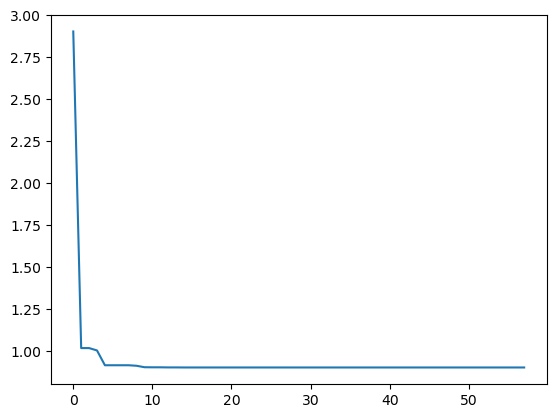

In [ ]:
demo_func = lambda x: x[0] ** 2 + (x[1] - 0.05) ** 2 + x[2] ** 2

from sko.SA import SAFast

sa_fast = SAFast(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, q=0.99, L=300, max_stay_counter=150,
                 lb=[-1, 1, -1], ub=[2, 3, 4], max_iter=1000)
sa_fast.run()
print('Fast Simulated Annealing with bounds: best_x is ', sa_fast.best_x, 'best_y is ', sa_fast.best_y)

import matplotlib.pyplot as plt
import pandas as pd

plt.plot(pd.DataFrame(sa_fast.best_y_history).cummin(axis=0))
plt.show()


# PyBADS

Not useful for us since only made for continuous domain


In [ ]:
import numpy as np
from pybads.bads import BADS
import matplotlib.pyplot as plt


In [ ]:
def rosenbrocks_fcn(x):
    """Rosenbrock's 'banana' function in any dimension."""
    x_2d = np.atleast_2d(x)
    return np.sum(100 * (x_2d[:, 0:-1]**2 - x_2d[:, 1:])**2 + (x_2d[:, 0:-1]-1)**2, axis=1)

target = rosenbrocks_fcn;

lower_bounds = np.array([-20, -20])
upper_bounds = np.array([20, 20])
plausible_lower_bounds = np.array([-5, -5])
plausible_upper_bounds = np.array([5, 5])
x0 = np.array([0, 0]);        # Starting point

options = {
    # "uncertainty_handling": True,
    "max_fun_evals": 100,
    # "noise_final_samples": 100
}


In [ ]:
bads = BADS(target, x0, lower_bounds, upper_bounds, plausible_lower_bounds, plausible_upper_bounds)
optimize_result = bads.optimize()
